In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
data = datasets.load_iris()

In [4]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df['target'] = data.target

In [6]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


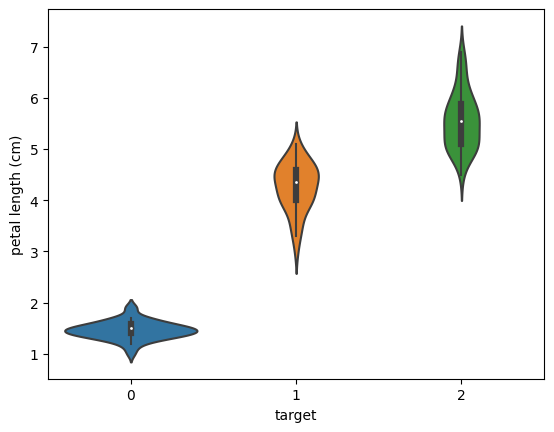

In [8]:
sns.violinplot(x='target', y='petal length (cm)', data=df)
plt.show()

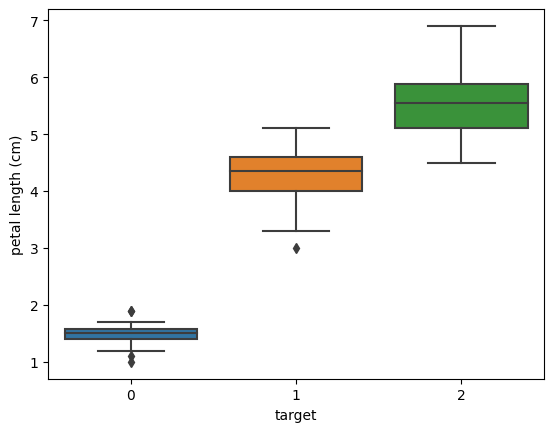

In [9]:
sns.boxplot(x='target', y='petal length (cm)', data=df)
plt.show()

In [10]:
X = data.data

In [14]:
wcss = []

for i in range(1, 11):
  kmeans = KMeans(n_clusters= i, max_iter=400, init='k-means++', n_init=10)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

Elbow Method

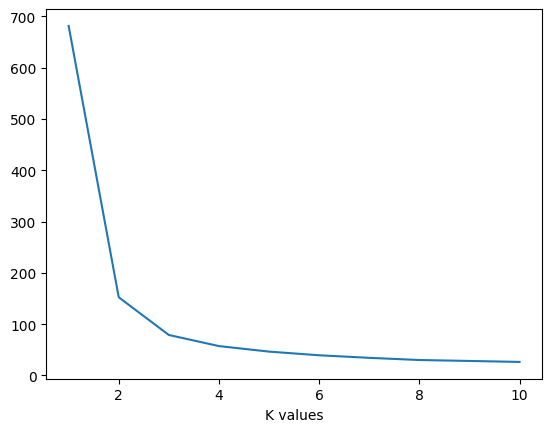

In [16]:
plt.plot(range(1, 11), wcss)
plt.xlabel('K values')
plt.show()

In [38]:
kmeans = KMeans(n_clusters= 3, max_iter=400, init='k-means++', n_init=10)
kmeans.fit(X)

KMeans(max_iter=400, n_clusters=3, n_init=10)

In [39]:
y_pred = kmeans.predict(X)

In [40]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

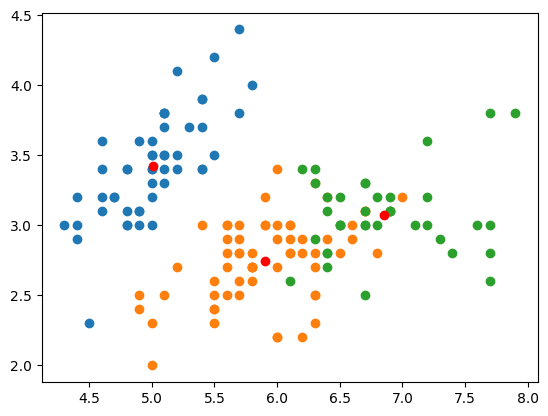

In [43]:
plt.scatter(X[y_pred ==0, 0], X[y_pred ==0, 1])
plt.scatter(X[y_pred ==1, 0], X[y_pred ==1, 1])
plt.scatter(X[y_pred ==2, 0], X[y_pred ==2, 1])
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='red')
plt.show()

In [32]:
silhouette_score(X, data.target)

0.5034774406932961